In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [46]:
def Sobel(image):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad,abs_grad_x,abs_grad_y

In [42]:
def sum_plot(image):
    (a,b,c) = Sobel(image)
    plt.subplot(1,2,1)
    plt.imshow(c,cmap='gray')
    high = []
    for line in c:
        high.append(sum(line))
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(high)),high)
    plt.show()

In [48]:
def image_to_sum_array(image):
    (a,b,c) = Sobel(image)
    high = []
    for line in c:
        high.append(sum(line))
    return np.array(high)

In [52]:
def image_to_sobel(image):
    (a,b,c) = Sobel(image)
    return np.array(c)

In [24]:
a_list = os.listdir("Dataset/A/")
b_list = os.listdir("Dataset/B/")
c_list = os.listdir("Dataset/C/")

(480, 640, 3)


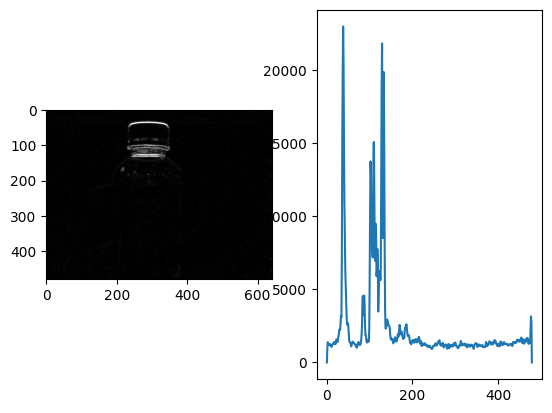

(480, 640, 3)


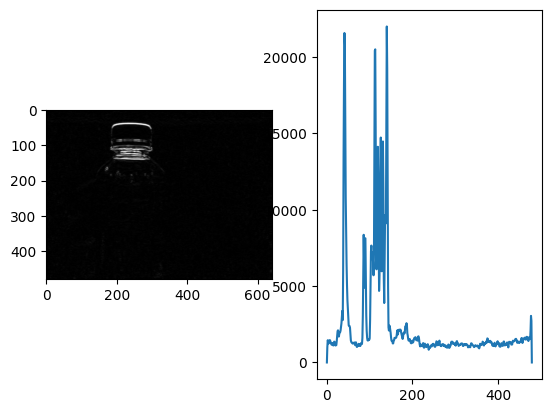

(480, 640, 3)


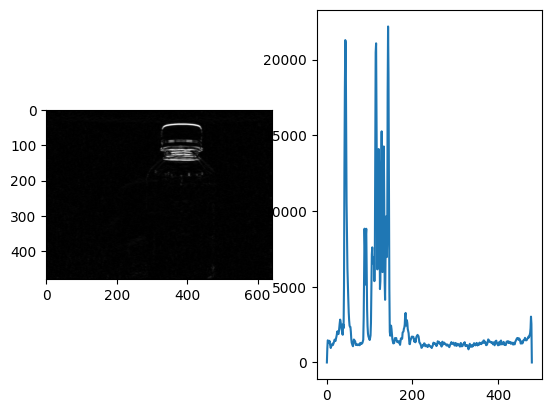

(480, 640, 3)


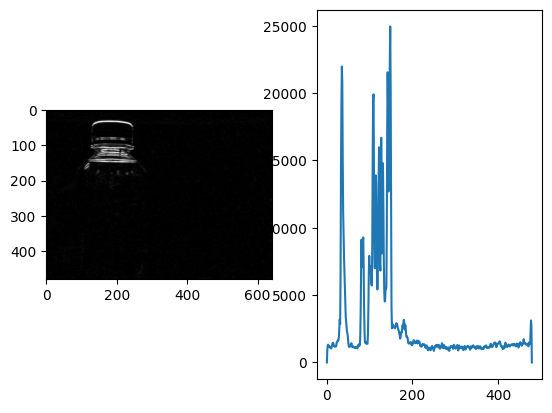

(480, 640, 3)


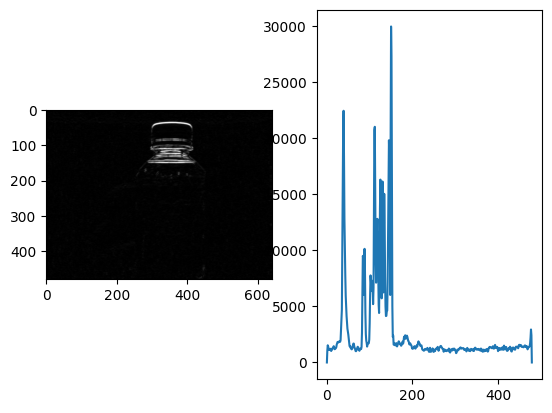

In [56]:
for i in range(5):
    image = cv2.imread(filename="Dataset/A/"+a_list[i*4])
    print(image.shape)
    sum_plot(image)

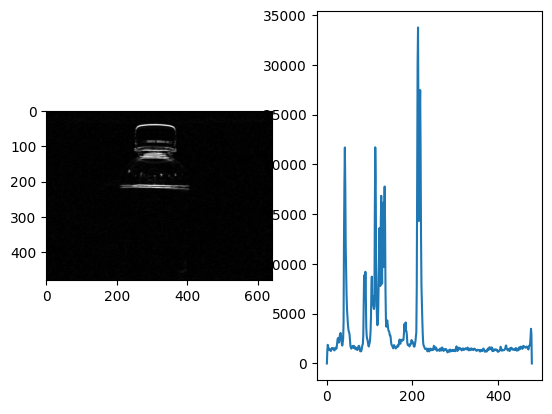

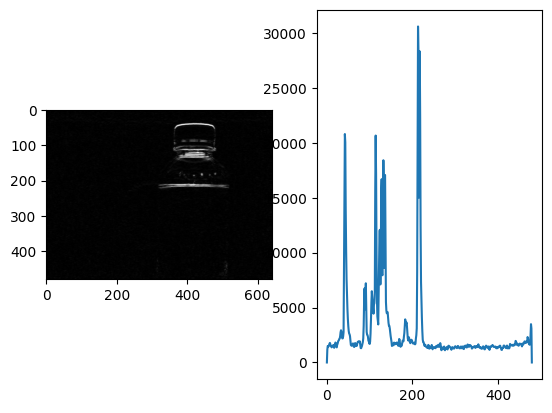

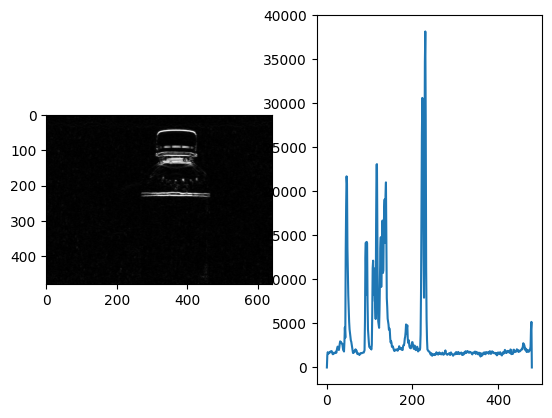

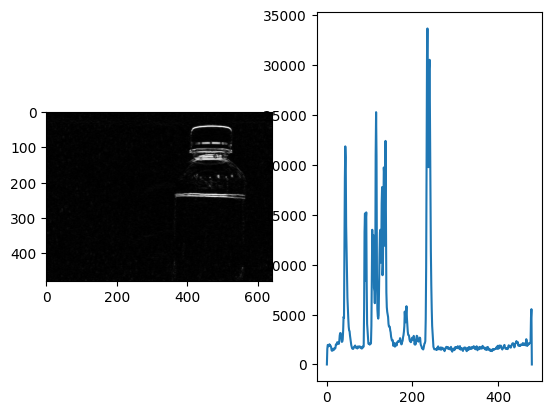

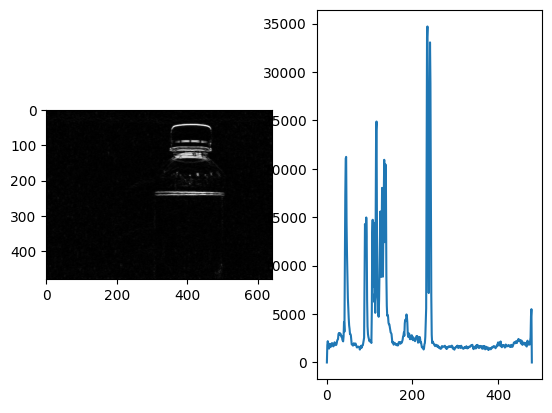

In [27]:
for i in range(5):
    image = cv2.imread(filename="Dataset/B/"+b_list[i*3])
    sum_plot(image)

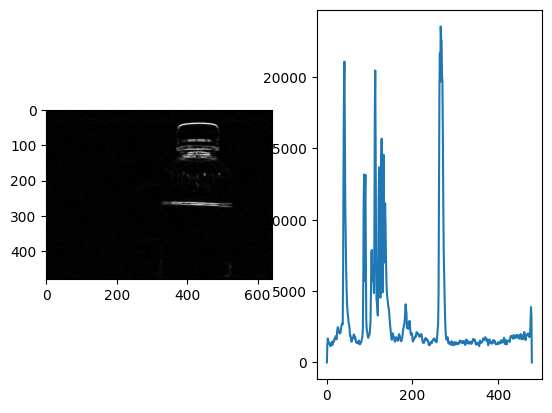

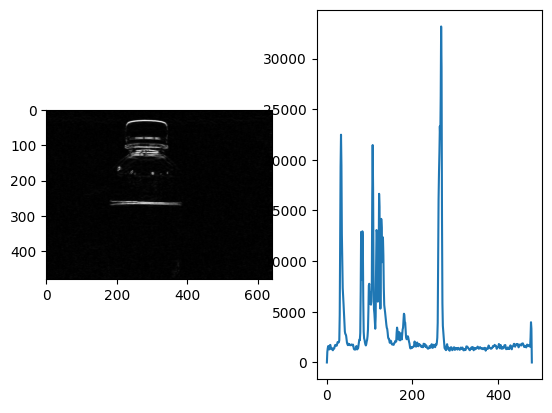

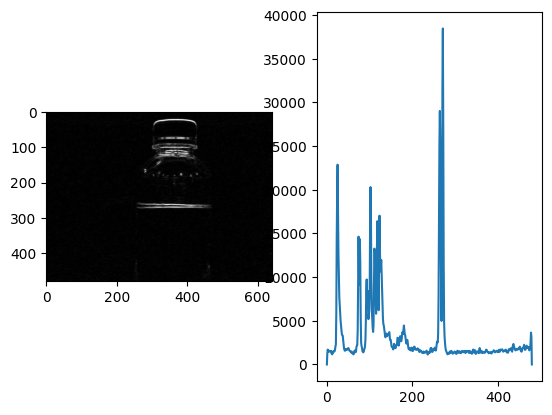

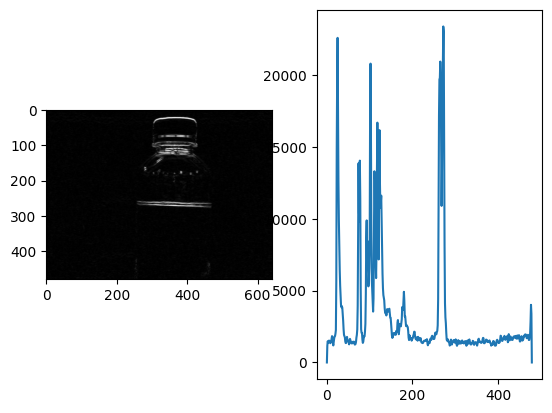

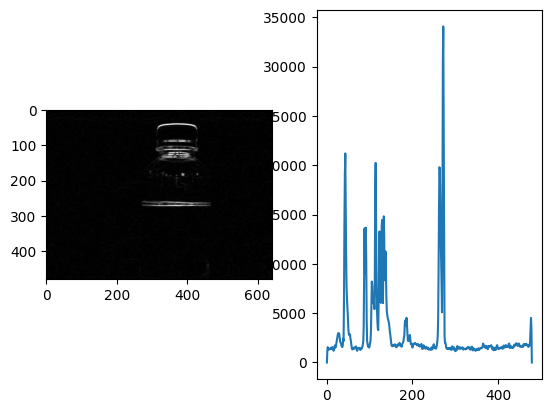

In [28]:
for i in range(5):
    image = cv2.imread(filename="Dataset/C/"+c_list[i])
    sum_plot(image)

In [71]:
import tensorflow as tf

In [73]:
from keras import Input, Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Dropout, Flatten, Dense
from keras.utils import plot_model

In [61]:
X1 = np.empty((len(a_list)+len(b_list)+len(c_list),480,640))
X2 = np.empty((len(a_list)+len(b_list)+len(c_list),480))

In [58]:
Y = np.empty((len(a_list)+len(b_list)+len(c_list),1))

In [64]:
for i in range(len(a_list)):
    image = cv2.imread(filename="Dataset/A/"+a_list[i])
    X1[i] = image_to_sobel(image)
    X2[i] = image_to_sum_array(image)
    Y[i] = 0

In [65]:
for i in range(len(b_list)):
    image = cv2.imread(filename="Dataset/B/"+b_list[i])
    X1[i+len(a_list)] = image_to_sobel(image)
    X2[i+len(a_list)] = image_to_sum_array(image)
    Y[i+len(a_list)] = 1

In [66]:
for i in range(len(c_list)):
    image = cv2.imread(filename="Dataset/C/"+c_list[i])
    X1[i+len(a_list)+len(b_list)] = image_to_sobel(image)
    X2[i+len(a_list)+len(b_list)] = image_to_sum_array(image)
    Y[i+len(a_list)+len(b_list)] = 2

In [106]:
Y.shape

(92, 1)

In [107]:
input1 = Input((480,640,1),10)
input2 = Input((480,1),10)

tower_1 = Conv2D(64, (10, 10), padding='same', activation='relu')(input1)
tower_1 = MaxPooling2D((5, 5), strides=(1, 1), padding='same')(tower_1)
tower_1 = Conv2D(32, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((5, 5), strides=(1, 1), padding='same')(tower_1)
tower_1 = Flatten()(tower_1)
tower_1 = Dense(64, activation='relu')(tower_1)

tower_2 = Dense(480,activation='relu')(input2)
tower_2 = Dropout(0.2)(tower_2)
tower_2 = Dense(128,activation="relu")(tower_2)
tower_2 = Dense(32,activation="relu")(tower_2)
tower_2 = Flatten()(tower_2)
tower_2 = Dense(64)(tower_2)

merged = Concatenate()([tower_1, tower_2])
merged = Flatten()(merged)
out = Dense(64, activation='relu')(merged)
out = Dense(1, activation='relu')(out)
model = Model((input1, input2), out)

In [108]:
model.compile(optimizer="adam",metrics=tf.keras.metrics.CategoricalAccuracy(),loss=tf.keras.losses.CategoricalCrossentropy())
model.fit([X1,X2],Y,10,10,verbose=1)

Epoch 1/10
 6/10 [=================>............] - ETA: 6:26 - loss: nan - categorical_accuracy: 1.0000